### A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

1. spending: Amount spent by the customer per month (in 1000s)
2. advance_payments: Amount paid by the customer in advance by cash (in 100s)
3. probability_of_full_payment: Probability of payment done in full by the customer to the bank
4. current_balance: Balance amount left in the account to make purchases (in 1000s)
5. credit_limit: Limit of the amount in credit card (10000s)
6. min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
7. max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

In [1]:
#Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings("ignore")

### 1.1 Read the data and do exploratory data analysis. Describe the data briefly. Interpret the inferences for each.

In [2]:
df = pd.read_csv(r'C:\Me\GreatLakes\Data Mining\Week5\bank_marketing_part1_Data.csv')
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [3]:
df.shape

(210, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


### Let us check if the data has any missing or duplicate values

In [5]:
df.isnull().sum() > 1

spending                        False
advance_payments                False
probability_of_full_payment     False
current_balance                 False
credit_limit                    False
min_payment_amt                 False
max_spent_in_single_shopping    False
dtype: bool

In [6]:
#Identify duplicates records in the data
dupes = df.duplicated()
sum(dupes)

0

<b>Observations: </b> There are no missing or duplicate values in the dataset.

------------------------------------------------------------------------

### Let us perform Exploratory Data Analysis [both univariate and multivariate]

# <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Univariate Analysis
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea">  Let us check the distribution of the data

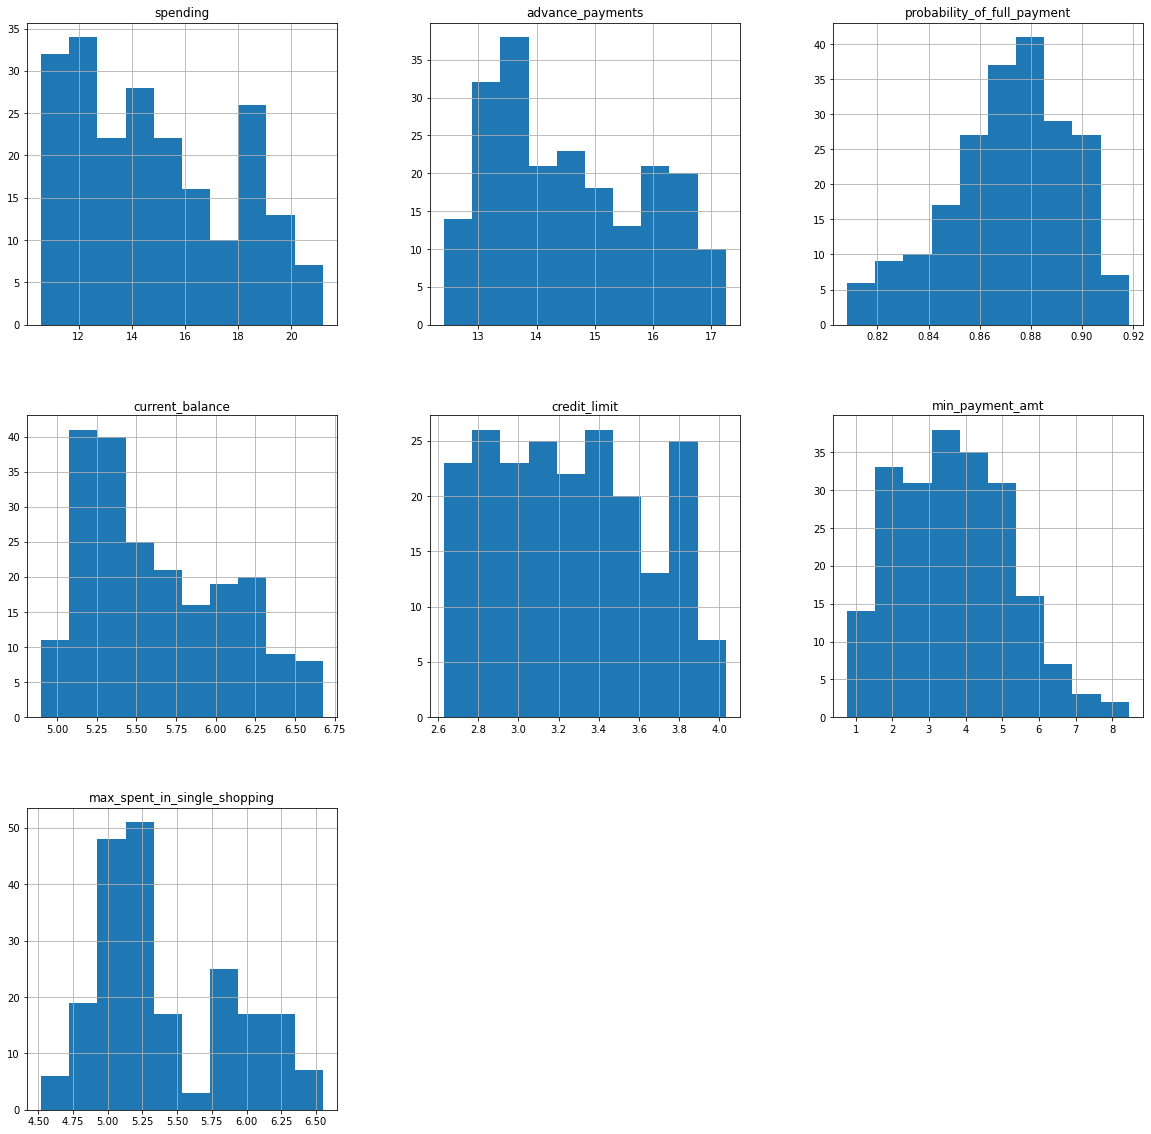

In [7]:
cols = df.columns

df[cols].hist(figsize=(20,20))
plt.show()

<b>Observations: </b> Distribution of all the columns in the dataset is non normal.
Most of them appear to be little right-skewed. probability_of_full_payment is left-skewed.

# <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Multivariate Analysis
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea">  First let us visualize the datapoints and the trend of credit limit wrt. Spending, Advance Payments and Current Balance using scatterplots

Text(0.5, 1.0, 'Credit limit - curr bal')

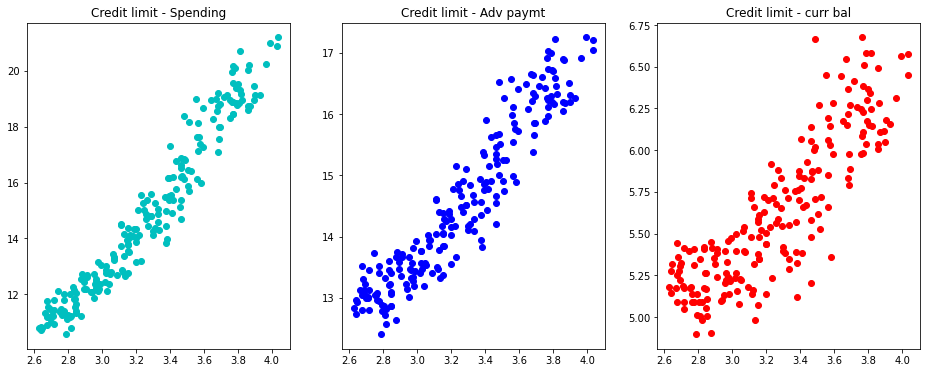

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(16,6))
axs[0].scatter(x=df['credit_limit'], y=df['spending'], color='c',)
axs[1].scatter(x=df['credit_limit'], y=df['advance_payments'], color='b')
axs[2].scatter(x=df['credit_limit'], y=df['current_balance'], color='r')

axs[0].set_title("Credit limit - Spending")
axs[1].set_title("Credit limit - Adv paymt")
axs[2].set_title("Credit limit - curr bal")

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea">  Now let us visualize the datapoints and the trend of Spending wrt. Max spent in single shopping, Advance Payments and Current Balance using scatterplots

Text(0.5, 1.0, 'Spending - curr bal')

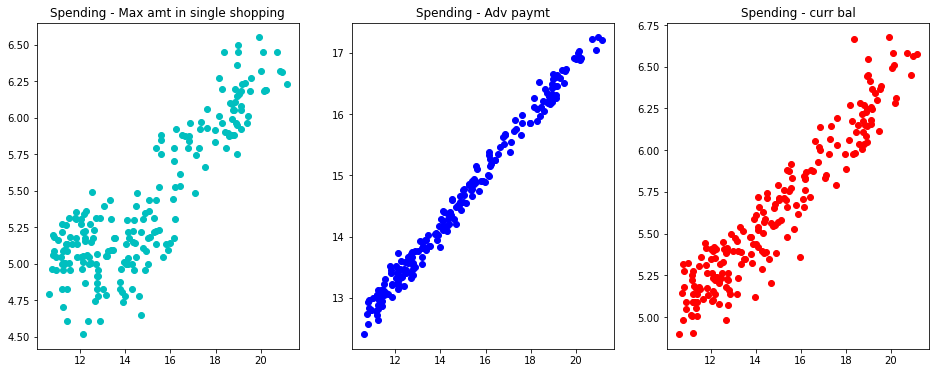

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(16,6))
axs[0].scatter(x=df['spending'], y=df['max_spent_in_single_shopping'], color='c',)
axs[1].scatter(x=df['spending'], y=df['advance_payments'], color='b')
axs[2].scatter(x=df['spending'], y=df['current_balance'], color='r')

axs[0].set_title("Spending - Max amt in single shopping")
axs[1].set_title("Spending - Adv paymt")
axs[2].set_title("Spending - curr bal")

<b>Observations: </b> There appears to be a strong positive correlation between credit limit and spending.

Both the variables are highly correlated to Advance payments and Current Balance.

Let us cross-check this using Pairplots and Heatmap. Also, check the correlation between other variables.

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea">Pairplot and Heatmap

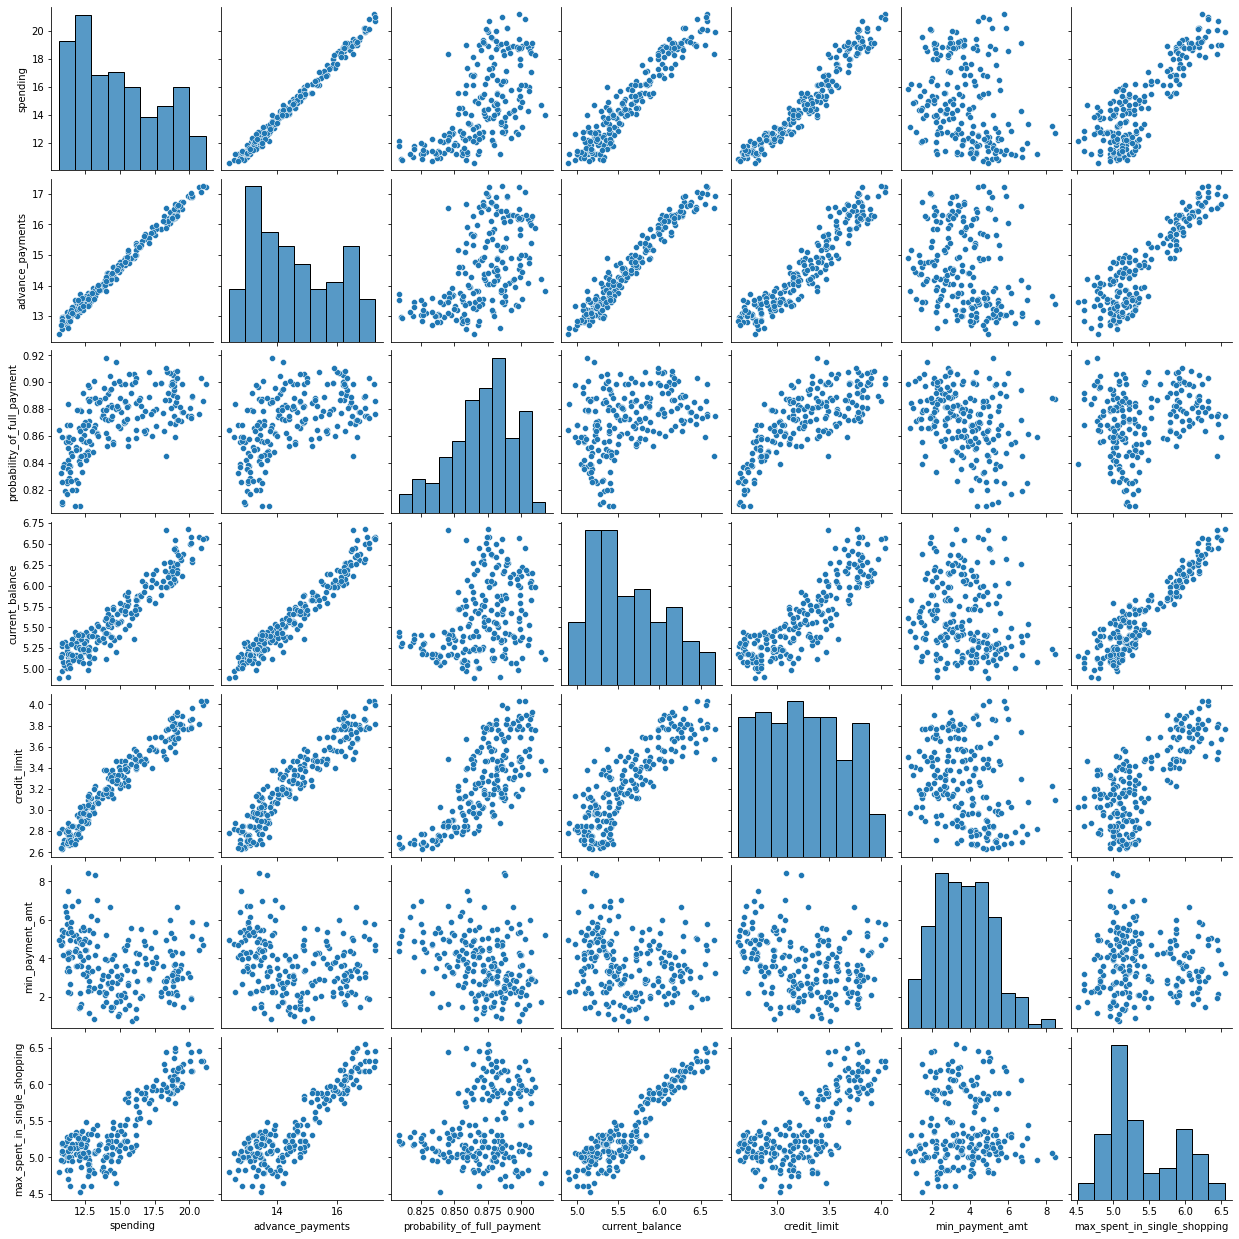

In [10]:
sns.pairplot(df)

<AxesSubplot:>

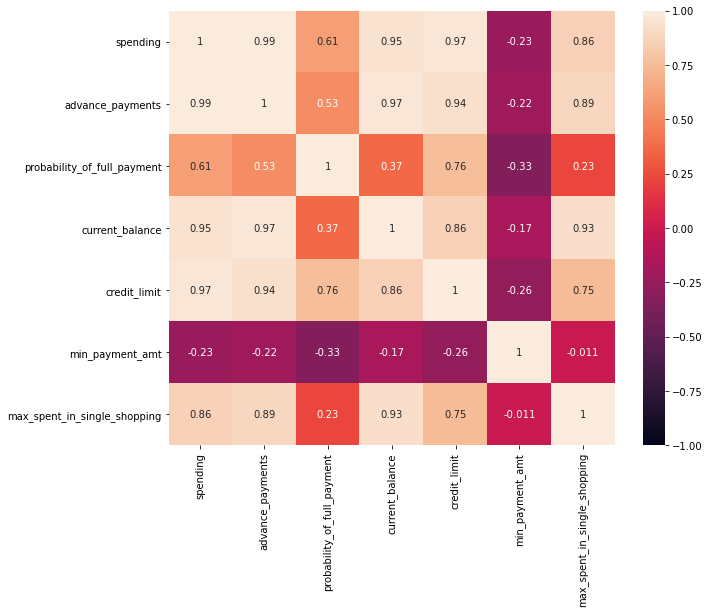

In [11]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, vmin=-1, vmax=1)

<b>Observations: </b> There is a strong positive correlation between - 

    - Spending, Advance Payments, current balance and credit limit
    - max_spent_in_single_shopping and current balance

max_spent_in_single_shopping is also positively correlated with spending, advance payments and credit limit.

probability_of_full_payment is moderately correlated with credit limit.

### Let us check outliers in the data

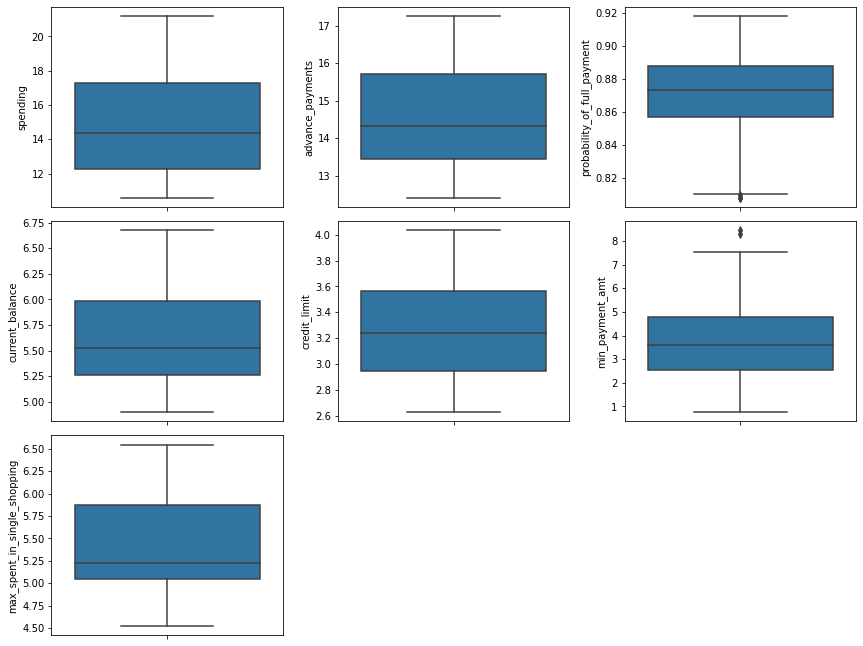

In [12]:
fig = plt.figure(figsize=(12,12))
j = 1
for i in df.columns:
    plt.subplot(4, 3, j)
    sns.boxplot(y=df[i])
    j = j + 1

plt.tight_layout()
plt.show()

### There are a few outliers in probability_of_full_payment and min_payment_amt, let us handle them

In [13]:
# Function to calculate the Q1 and Q3 values & Outlier limits
def ol_limits(col):
    # sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [14]:
cols = ['probability_of_full_payment', 'min_payment_amt']

In [15]:
for col in cols:
    lr_limit, up_limit = ol_limits(df[col])
    df[col] = np.where(df[col] < lr_limit, lr_limit, df[col])
    df[col] = np.where(df[col] > up_limit, up_limit, df[col])

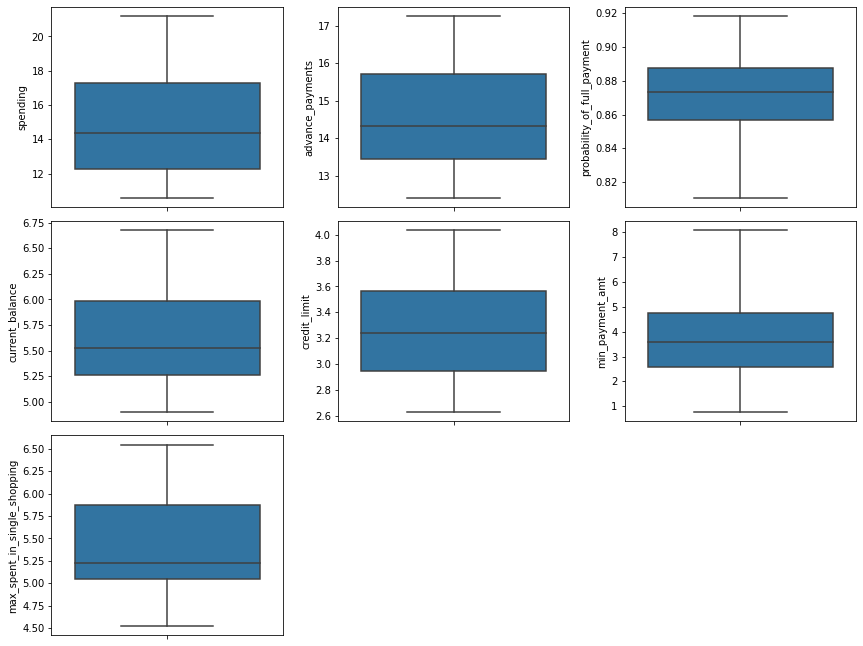

In [16]:
fig = plt.figure(figsize=(12,12))
j = 1
for i in df.columns:
    plt.subplot(4, 3, j)
    sns.boxplot(y=df[i])
    j = j + 1

plt.tight_layout()
plt.show()

<b>Observations: </b> Now there don't seem to be any outliers in the dataset.

-----------------------------------------------------

### 1.2 Do you think scaling is necessary for clustering in this case? Justify

In [17]:
df.describe().round(2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.00,210.00,210.00,210.00,210.00,210.00,210.00
mean,14.85,14.56,0.87,5.63,3.26,3.70,5.41
std,2.91,1.31,0.02,0.44,0.38,1.49,0.49
min,10.59,12.41,0.81,4.90,2.63,0.77,4.52
25%,12.27,13.45,0.86,5.26,2.94,2.56,5.04
50%,14.36,14.32,0.87,5.52,3.24,3.60,5.22
75%,17.30,15.72,0.89,5.98,3.56,4.77,5.88
max,21.18,17.25,0.92,6.68,4.03,8.08,6.55


Scaling the data is necessary here as we know from data description the columns are at different scales.
For example - Spending is in the scale of 1000s whereas credit_limit is in the scale of 10000s.

The mean output from describe function also shows that different variables are at different scales.

Let us also see this visually - 

<AxesSubplot:>

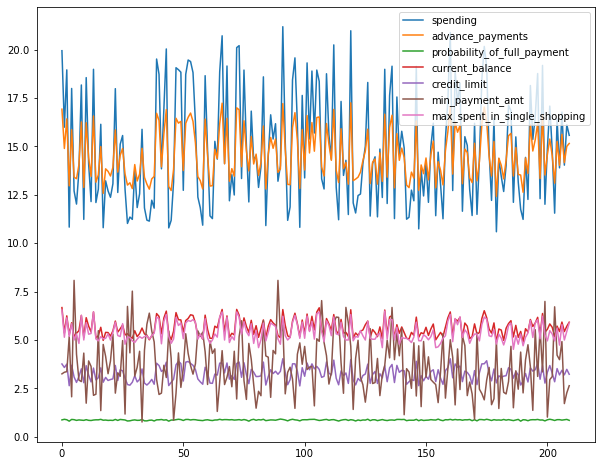

In [18]:
df.plot(figsize=(10,8))

<AxesSubplot:>

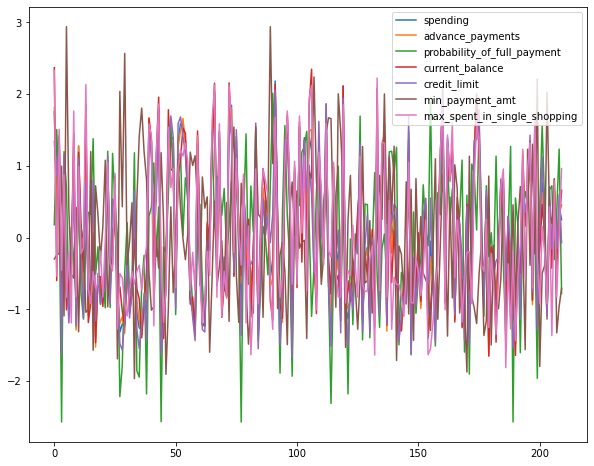

In [61]:
df.apply(zscore).plot(figsize=(10,8))

<b>Observations: </b>It is apparent from the graphs that scaling is necessary for the dataset.

-----------------------------------------------------------------------

### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them.

In [19]:
std_scaler = StandardScaler()

In [20]:
df_scaled = std_scaler.fit_transform(df)

In [21]:
df_scaled = pd.DataFrame(data=df_scaled, columns=df.columns)
df_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


In [22]:
wardlink_scaled = linkage(df_scaled, method = 'ward')

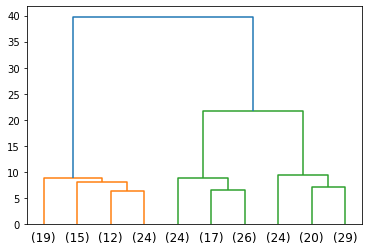

In [23]:
dend_ward = dendrogram(wardlink_scaled,
                 truncate_mode='lastp',
                 p=10)

In [24]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'
clusters_ward = fcluster(wardlink_scaled, 3, criterion='maxclust')
clusters_ward

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [26]:
df_orig_heirclust = df.copy()
df_scaled_heirclust = df_scaled.copy()
df_orig_heirclust['clusters'] = clusters_ward
df_scaled_heirclust['clusters'] = clusters_ward

In [27]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837


In [28]:
df_orig_heirclust.clusters.value_counts()

3    73
1    70
2    67
Name: clusters, dtype: int64

In [29]:
df_orig_heirclust.groupby('clusters').mean()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
clusters,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371
2,11.872388,13.257015,0.848155,5.238940,2.848537,4.940302,5.122209
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178


In [30]:
avglink_scaled = linkage(df_scaled, method = 'average')

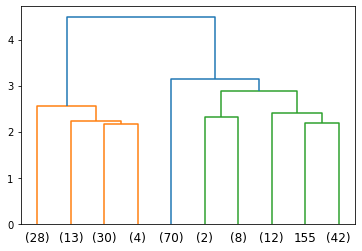

In [31]:
dend_avg = dendrogram(avglink_scaled,
                 truncate_mode='lastp',
                 p=10)

In [32]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'
clusters_avg = fcluster(avglink_scaled, 3, criterion='maxclust')
clusters_avg

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [33]:
df_orig_heirclustavg = df.copy()
df_orig_heirclustavg['clusters'] = clusters_avg

In [34]:
df_orig_heirclustavg.clusters.value_counts()

1    75
2    70
3    65
Name: clusters, dtype: int64

In [35]:
df_orig_heirclustavg.groupby('clusters').mean()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
clusters,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040
2,11.916857,13.291000,0.846845,5.258300,2.846000,4.619000,5.115071
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.759007,5.055569


<b>Observations: </b>From the tables, we can see that means are almost the same for both ward and average linkages.

----------------------------------------------------------------

### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Interpret the inferences from the model.

In [36]:
df.head(2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144


In [37]:
df_scaled.head(2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582


In [38]:
k_means = KMeans(n_clusters=3, random_state=1)
k_means

KMeans(n_clusters=3, random_state=1)

In [39]:
# Fit K means on the scaled_df
k_means.fit(df_scaled)

KMeans(n_clusters=3, random_state=1)

In [40]:
k_means.inertia_

430.298481751223

Let’s see how we can use the elbow curve to determine the optimal number of clusters - 

In [41]:
wss = []

In [42]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)

In [43]:
wss

[1469.9999999999998,
 659.1474009548498,
 430.298481751223,
 371.221763926848,
 326.8846407681858,
 290.15133123739645,
 263.0291032947617,
 242.8107073317113,
 221.4875969822111,
 206.32904650770408]

<AxesSubplot:>

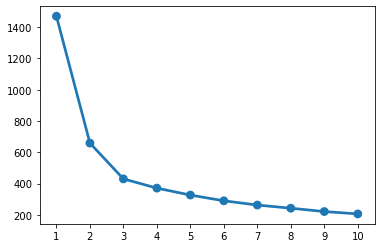

In [44]:
a = [1,2,3,4,5,6,7,8,9,10]
sns.pointplot(a, wss)

# KMeans with K=4

In [45]:
k_means = KMeans(n_clusters = 4, random_state=1)
k_means.fit(df_scaled)
labels_4clust = k_means.labels_

In [46]:
silhouette_score(df_scaled, labels_4clust)

0.32943733699973826

# KMeans with K=3

In [47]:
k_means = KMeans(n_clusters = 3, random_state=1)
k_means.fit(df_scaled)
labels = k_means.labels_

In [48]:
silhouette_score(df_scaled, labels)

0.4008059221522216

# KMeans with K=2

In [49]:
k_means = KMeans(n_clusters = 2, random_state=1)
k_means.fit(df_scaled)
labels_2clust = k_means.labels_

In [50]:
silhouette_score(df_scaled, labels_2clust)

0.46560100442748986

<b>Observations: </b>Looking at the silhoutte score, I think we can go with either 2 or 3 clusters. We will go with 3 clusters here to create more specific and targeted customer segments.

--------------------------------------------------------

### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters in context to the business problem in-hand.

In [51]:
df_kmeans = df.copy()
df_kmeans['clusters'] = labels

In [52]:
df_kmeans.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,0
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,0
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,0


### Cluster Profiling

In [53]:
df_kmeans['clusters'].value_counts().sort_index()

0    67
1    72
2    71
Name: clusters, dtype: int64

In [54]:
clust_profile = df_kmeans.groupby('clusters').mean()

In [55]:
clust_profile['freq']=df_kmeans['clusters'].value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
clusters,,,,,,,,
0,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67
1,11.856944,13.247778,0.848330,5.231750,2.849542,4.733892,5.101722,72
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71


In [56]:
clust_profile = clust_profile.reset_index()

In [ ]:
for c in clust_profile:
    g   = sns.FacetGrid(clust_profile, col='clusters')
    g.map(plt.hist, c, color = "red")

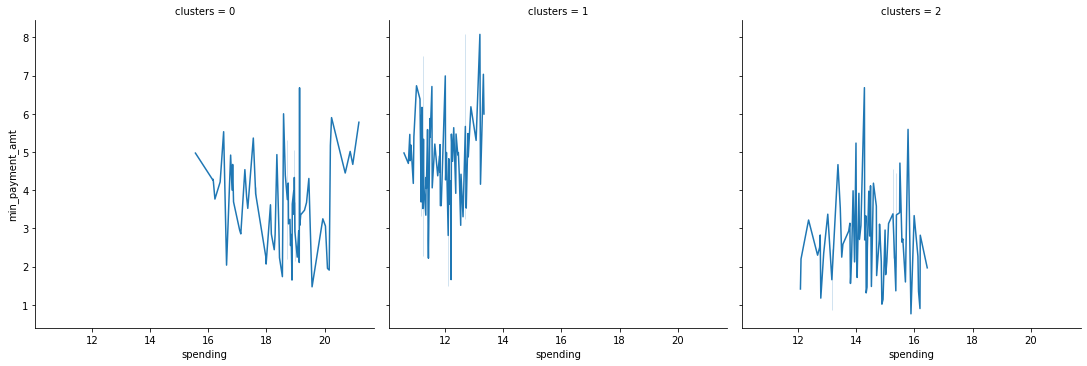

In [57]:
sns.relplot(data=df_kmeans, x='spending', y='min_payment_amt', kind='line', col='clusters')

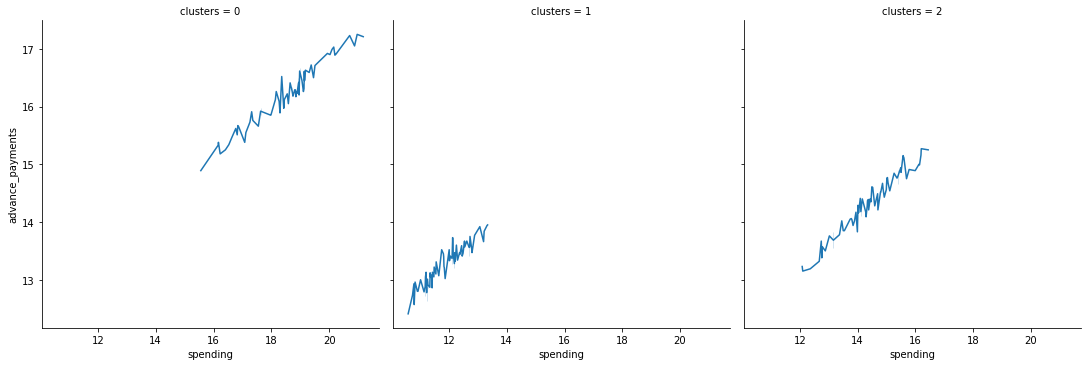

In [58]:
sns.relplot(data=df_kmeans, x='spending', y='advance_payments', kind='line', col='clusters')

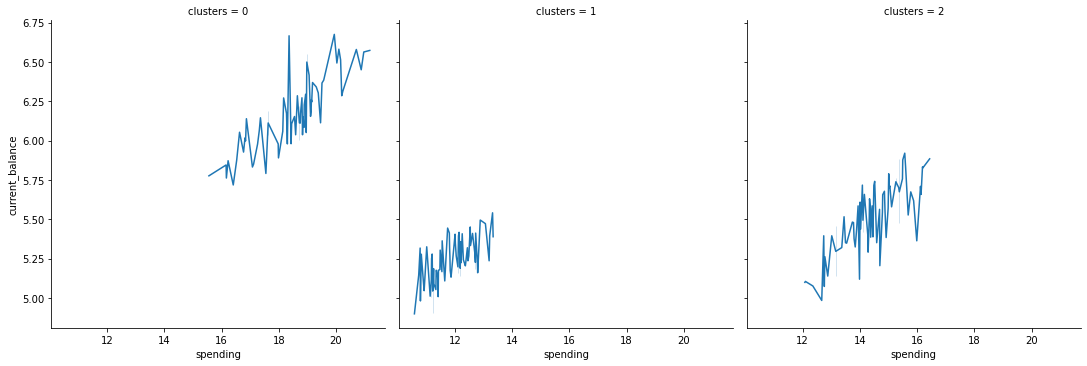

In [59]:
sns.relplot(data=df_kmeans, x='spending', y='current_balance', kind='line', col='clusters')

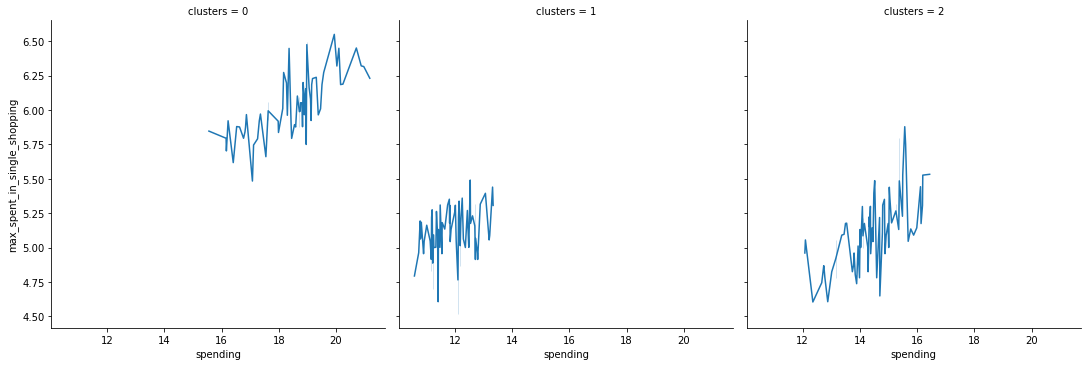

In [60]:
sns.relplot(data=df_kmeans, x='spending', y='max_spent_in_single_shopping', kind='line', col='clusters')

From the above graphs and metrics, we can propose 3 customer groups as decsribed below - 

1. Cluster 0 - High Spending group

2. Cluster 1 - Low Spending group

3. Cluster 2 - Moderate Spending group

Basis of these groups, targeted strategies and promotions can be thought of - 

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> High Spending group
- This is the group which spends the most, with higher advance payments, higher spends in one-off purchases
- Introducing reward accelerators like two or three times more reward points may lead to increased spends
- Tie ups with more brands esp. premium brands can lead more on-off purchases
- Spend & Get offers, like spend min X amount and get some incentives may also encourage more purchases

    
### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Moderate Spending group
- This group should be trageted in such a way that it can potentially move to High Spending group
- Increasing credit limit can encourage higher spends
- Introducing loyalty bonus points/rewards can help promote the card and increase purchases
- The minimum payment amount on an average for this group is slightly on the lower side, so cutting down the interest rates can be encouraging
    

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Low spending group
- This is the group which spends the least, with lower advance payments, lesser spends in one-off purchases but with more minimum payment amount
- The goal here should be to encourage repeat usage of the card, esp. on lesser value transactions like groceries, food, fuel etc.
- Introducing cashback offers like Transact X number of times and get some Y% cash can encourage repeat transactions. Cashback offers can work better than rewards for this group.
- Offers like EMIs or 0% interest can also encourage slightly higher value transactions in this group
- Tie-ups with supermarkets for targeted discounts will encourage higher spends
- Interest cut downs on advance payments can help increase payments